![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import ast
import datetime

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
29314,id_4376,Paris,"['Mediterranean', 'Spanish']",4377.0,$$ - $$$,104.0,"[['Great Bar, Super Tapas', 'great tapas'], ['...",/Restaurant_Review-g187147-d783286-Reviews-Les...,d783286,1,4.0
11367,id_2707,London,"['European', 'British', 'Gluten Free Options']",2712.0,$$ - $$$,74.0,"[['The Finest High Tea in London', 'Wonderful ...",/Restaurant_Review-g186338-d1408975-Reviews-Eg...,d1408975,1,4.5
18429,id_6407,London,"['Bar', 'British', 'Pub', 'Gastropub', 'Vegeta...",6416.0,$$ - $$$,108.0,"[['Sunday roast', 'Lazing on a sunny afternoon...",/Restaurant_Review-g186338-d3294000-Reviews-Th...,d3294000,1,4.0
24289,id_2121,London,"['American', 'Fast Food', 'Diner']",2125.0,$,222.0,"[['Proper greasy American style!', 'Even Avera...",/Restaurant_Review-g186338-d8300762-Reviews-Fi...,d8300762,1,4.0
8961,id_8961,Krakow,NaN,714.0,NaN,9.0,[['Brilliant little Burger bar - and spoke en....,/Restaurant_Review-g274772-d12341554-Reviews-B...,d12341554,0,0.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [17]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
#data['Number of Reviews'].fillna(0, inplace=True)
#Заполним пропуски медианным значением по городам
df_numberreviews = data.groupby('City')['Number of Reviews'].median()

def fill_number_review(row):
    if pd.isnull(row['Number of Reviews']):
        return df_numberreviews[row['City']]
    return row['Number of Reviews']

data['Number of Reviews'] = data.apply(fill_number_review, axis=1)


In [18]:
#Заполним пропуски в Reviews
data['Reviews_isNAN'] = pd.isna(data['Reviews']).astype('uint8')
data['Reviews'].fillna("'',''", inplace=True)

In [19]:
# Заполним пропуски в типах кохонь
data['Cuisine Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')
data['Cuisine Style'].fillna('None', inplace=True)


In [20]:
# Заполним пропуски в PriceRange
data['Price RangeisNAN'] = pd.isna(data['Price Range']).astype('uint8')
data['Price Range'].fillna('$$ - $$$', inplace=True)


In [21]:
# Создадим столбец со списком из типов кухонь
data['CS'] = data['Cuisine Style'].apply(lambda style: ast.literal_eval(style))


In [22]:
# Создадим столбец, с количеством кухонь в ресторане
data['CS_Sum'] = data['CS'].str.len()


In [23]:
# добавим информацию о населении

city_population = {
    'London': 8787892,
    'Paris': 2187526,
    'Madrid': 3300000,
    'Barcelona': 1593075,
    'Berlin': 3726902,
    'Milan': 1331586,
    'Rome': 2860000,
    'Prague': 1300000,
    'Lisbon': 505526,
    'Vienna': 1900000,
    'Amsterdam': 872080,
    'Brussels': 144784,
    'Hamburg': 1840000,
    'Munich': 1558395,
    'Lyon': 506615,
    'Stockholm': 975904,
    'Budapest': 1752286,
    'Warsaw': 1720398,
    'Dublin': 1793579 ,
    'Copenhagen': 1330993,
    'Athens': 3090508,
    'Edinburgh': 476100,
    'Zurich': 402275,
    'Oporto': 237559,
    'Geneva': 196150,
    'Krakow': 779115,
    'Oslo': 697549,
    'Helsinki':  656229,
    'Bratislava': 563682,
    'Luxembourg': 626108,
    'Ljubljana': 295504
}

data['city_population'] = data['City'].map(city_population)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [24]:
data.drop('CS', axis=1).nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    3
Number of Reviews           1576
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
Reviews_isNAN                  2
Cuisine Style_isNAN            2
Price RangeisNAN               2
CS_Sum                        15
city_population               31
dtype: int64

In [25]:
# Посчитаем в скольких гордах представлен ресторан
city_grp = pd.DataFrame(data.groupby('Restaurant_id')['City'].count())
city_grp.reset_index(inplace=True)
city_grp.columns = ['Restaurant_id', 'CityCnt']
data = data.merge(city_grp, how='left', on='Restaurant_id')

# Посчитаем сколько ресторонов в городе
RestCnt = pd.DataFrame(data.groupby('City')['ID_TA'].count())
RestCnt.reset_index(inplace=True)
RestCnt.columns = ['City', 'RestCnt']
data = data.merge(RestCnt, how='left', on='City')


In [26]:
# необходимо отнормировать критерий Ranking по городам City
mean_Ranking_on_City = data.groupby(['City'])['Ranking'].mean()
count_Restorant_in_City = data['City'].value_counts(ascending=False)
data['mean_Ranking_on_City'] = data['City'].apply(lambda x: mean_Ranking_on_City[x])
data['count_Restorant_in_City'] = data['City'].apply(lambda x: count_Restorant_in_City[x])
data['norm_Ranking_on_Rest_in_City'] = (data['Ranking'] - data['mean_Ranking_on_City']) / data['count_Restorant_in_City']

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [27]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [28]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
43268,id_509,"['Dutch', 'European', 'Vegetarian Friendly', '...",510.0,$$ - $$$,250.0,"[['Tasty food vege and vegan', 'Very Tasty'], ...",/Restaurant_Review-g188590-d1382299-Reviews-De...,d1382299,1,4.0,...,0,0,0,0,0,0,0,0,0,0
11825,id_3655,"['European', 'Czech']",3664.0,$$ - $$$,19.0,"[[], []]",/Restaurant_Review-g274707-d7123406-Reviews-Pa...,d7123406,1,3.0,...,0,0,0,1,0,0,0,0,0,0
6588,id_6588,['Mediterranean'],1196.0,$,25.0,"[['Where the tradition meets the taste', ""Has ...",/Restaurant_Review-g189400-d7349403-Reviews-Sp...,d7349403,0,0.0,...,0,0,0,0,0,0,0,0,0,0
32471,id_14099,"['Bar', 'British', 'Pub']",14109.0,$$ - $$$,84.0,"[['Seriously slow service', 'Lovely fish and c...",/Restaurant_Review-g186338-d3568387-Reviews-Th...,d3568387,1,3.5,...,0,0,0,0,0,0,0,0,0,0
408,id_408,"['Vegetarian Friendly', 'Vegan Options']",5754.0,$$ - $$$,26.0,"[['AMAZING but gutted it has now closed!', 'Mu...",/Restaurant_Review-g186338-d9858059-Reviews-Qu...,d9858059,0,0.0,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [30]:
data['Price Range'].value_counts()

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [31]:
# Ваша обработка 'Price Range'
prcrng = {'$':'1', '$$ - $$$':'2', '$$$$':'3'}
data['PriceRNG'] = data['Price Range'].map(prcrng)


In [32]:
#Кухни
df_explode = data.explode('CS')
data = data.join(pd.get_dummies(df_explode['CS']).sum(level=0))


> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [33]:
# тут ваш код на обработку других признаков
# .....

In [34]:
#Поработаем с отзывами
# Есть строки, где в списке встречается 'nan', заменим его
data[data['Reviews'].str.contains('nan')].Reviews


786      [['Bad Maintenance', "Better viewed from the o...
1604     [['Yummy new Hunan restaurant!'], ['04/21/2013']]
3841     [['Excellent food, lavish interior at exclusi....
5302     [['Rude service, even with a pregnant woman'],...
6373     [['The heritage of Pierre Wynants', 'Totally w...
11631               [['No impresionante'], ['06/24/2017']]
15315    [['Will certainly be back', nan], ['11/26/2017...
22643    [['buckwheat crepes (au sarrasin)', 'Crepe wit...
24650    [['"The" bar to visit in Bonanova', 'Not expen...
29090    [['Ark of the Covenant', 'Average food, unsati...
31678    [['Nasty cheap', 'Penang Beef good, red and gr...
31878    [['I needed sustenance and a coffee after an.....
32958    [[nan, 'Good food with decent service'], ['11/...
38206    [['Friendly staff, good food', 'I want this ba...
39031    [['Delicious', 'Great Panang Curry'], ['11/13/...
40457    [['Good coffee, great atmosphere', 'Good coffe...
44516    [['Decent spanish food', 'Good food/parrillada.

In [35]:
data['Reviews'][15315] = data['Reviews'][15315].replace('nan', "''")
data['Reviews'][32958] = data['Reviews'][32958].replace('nan', "''")


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
# Преобразуем в список
data['RevList'] = data['Reviews'].apply(lambda rev: ast.literal_eval(rev))


In [37]:
# Достанем отзывы
data['Rev'] = data['RevList'].apply(lambda rev: rev[0])
# Достанем даты отзывово
data['Date'] = data['RevList'].apply(lambda rev: rev[1])
# Посмотрим на длины списков
data['RevLen'] = data['Rev'].apply(lambda rev: len(rev))
data['DateLen'] = data['Date'].apply(lambda dat: len(dat))


In [38]:
data

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan,RevList,Rev,Date,RevLen,DateLen
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,0,"[[], []]",[],[],0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,"[[Very good reviews!, Fine dining in Hakaniemi...","[Very good reviews!, Fine dining in Hakaniemi]","[12/05/2017, 10/29/2017]",2,2
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,"[[Better than the Links, Ivy Black], [12/28/20...","[Better than the Links, Ivy Black]","[12/28/2017, 12/06/2017]",2,2
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,"[[Most exquisite, Delicious and authentic], [1...","[Most exquisite, Delicious and authentic]","[12/06/2017, 11/22/2017]",2,2
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,"[[Always the best in bratislava, Very good but...","[Always the best in bratislava, Very good but ...","[02/08/2018, 01/24/2018]",2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,0,0,0,0,"[[The real Italian experience!, Wonderful food...","[The real Italian experience!, Wonderful food,...","[12/16/2017, 11/12/2017]",2,2
49996,id_6340,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,0,0,0,0,0,"[[Parisian atmosphere, Bit pricey but interest...","[Parisian atmosphere, Bit pricey but interesti...","[12/21/2017, 12/12/2017]",2,2
49997,id_1649,"['Japanese', 'Sushi']",1652.0,$$ - $$$,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,0,0,"[[Good by swedish standards, A hidden jewel in...","[Good by swedish standards, A hidden jewel in ...","[11/03/2016, 04/12/2008]",2,2
49998,id_640,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,0,0,0,0,"[[Underground restaurant, Oldest Restaurant in...","[Underground restaurant, Oldest Restaurant in ...","[07/11/2017, 06/18/2017]",2,2


In [39]:
data['RevLen'].value_counts()

2    36206
0     8114
1     5680
Name: RevLen, dtype: int64

In [40]:
data['DateLen'].value_counts()

2    36206
0     8114
1     5680
Name: DateLen, dtype: int64

In [41]:
# Есть пустые списки - нет отзывов
# Есть список тольколь с одним отзывом
# Есть список с двумя отзывами


In [42]:
data['Dat1'] = data['Date'].apply(lambda dat: pd.to_datetime(dat[0]) if len(dat)>0 else np.nan)
data['Dat2'] = data['Date'].apply(lambda dat: pd.to_datetime(dat[1]) if len(dat)>1 else np.nan)


In [43]:
# Псмотрим на дату самого свежего отзыва
print(data['Dat1'].max()) , print(data['Dat2'].max())
print(data['Dat1'].mean()) , print(data['Dat2'].mean())
# На дату самого старого
print(data['Dat1'].min()) , print(data['Dat2'].min())
print(data['Dat1'].mean()) , print(data['Dat2'].mean())


2018-02-26 00:00:00
2018-02-26 00:00:00
2017-05-04 06:05:22.819055616
2017-02-23 19:43:37.621401344
2004-04-21 00:00:00
2007-11-14 00:00:00
2017-05-04 06:05:22.819055616
2017-02-23 19:43:37.621401344


(None, None)

In [44]:
# Добавим конку интервала времени между первым и вторым отзывом
data['DatInterval'] = data['Dat1'] - data['Dat2']

In [45]:
data['DatFromNow'] = datetime.datetime.now() - data['Dat2']

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

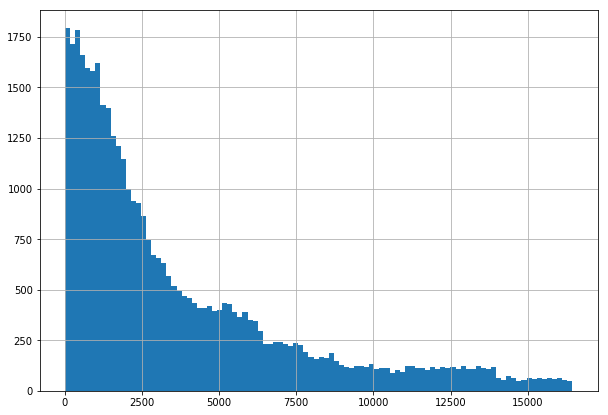

In [46]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

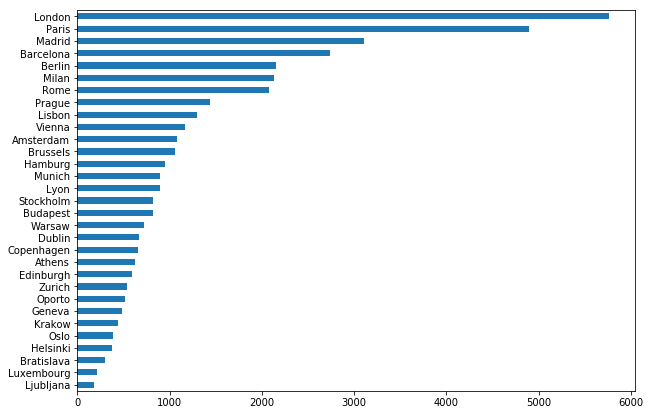

In [47]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

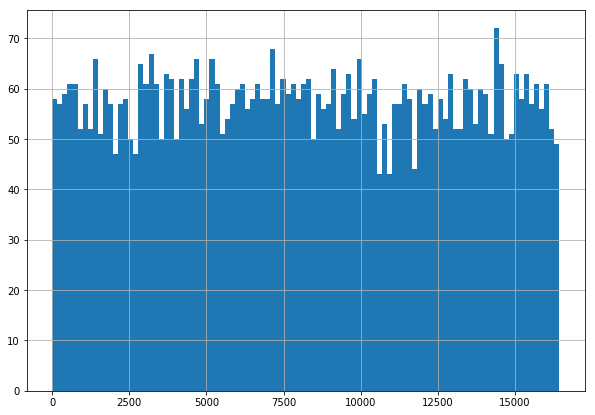

In [48]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

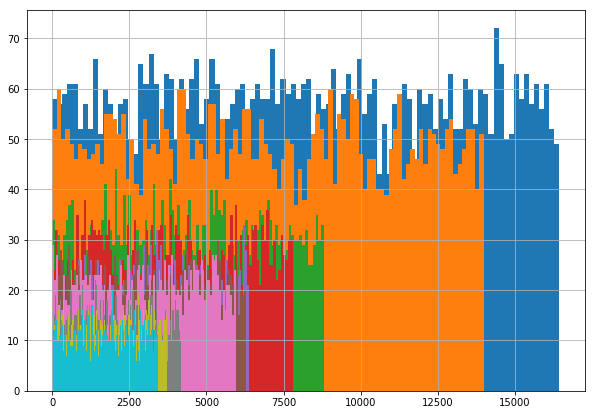

In [49]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

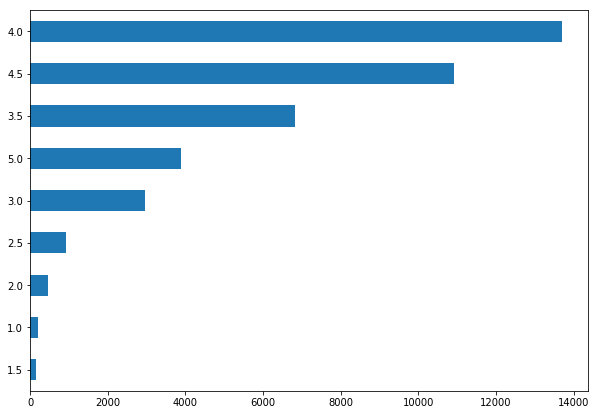

In [50]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

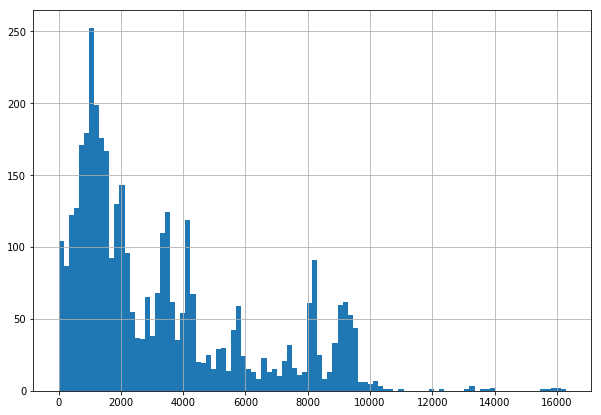

In [51]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

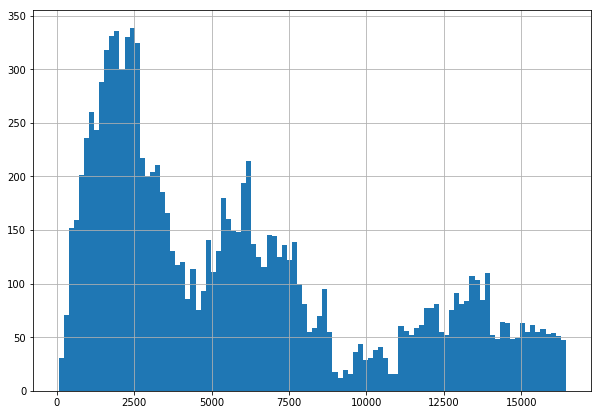

In [52]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

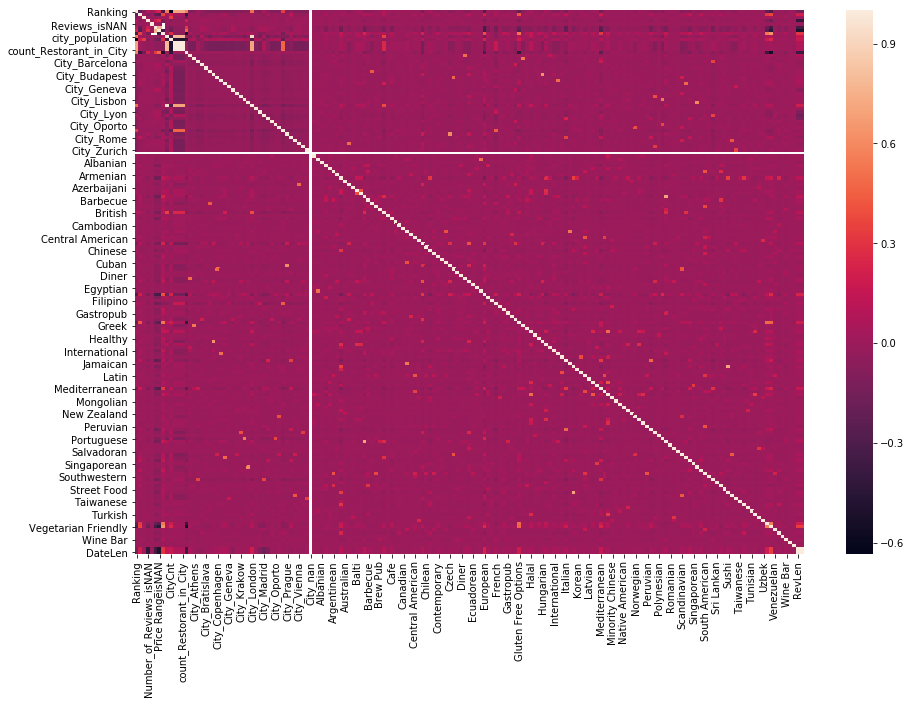

In [53]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [54]:
# на всякий случай, заново подгружаем данные
#df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
#df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
#df_train['sample'] = 1 # помечаем где у нас трейн
#df_test['sample'] = 0 # помечаем где у нас тест
#df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

#data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

# Преобразование в числовой тип
data = data.apply(pd.to_numeric, errors='ignore')
# Заполнение всех пропусков 0
data.fillna(0, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 189 entries, Restaurant_id to DatFromNow
dtypes: float64(6), int64(12), object(10), uint8(161)
memory usage: 20.0+ MB


In [55]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    #df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    #df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [56]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,Reviews_isNAN,Cuisine Style_isNAN,Price RangeisNAN,CS_Sum,city_population,...,Welsh,Wine Bar,Xinjiang,Yunnan,RevLen,DateLen,Dat1,Dat2,DatInterval,DatFromNow
24391,433.0,71.0,1,4.0,0,0,0,0,5.0,476100,...,0,0,0,0,2,2,1514678400000000000,1514592000000000000,86400000000000,100212497518742000
34870,1750.0,20.5,1,4.0,1,0,0,1,2.0,975904,...,0,0,0,0,1,1,1467331200000000000,-9223372036854775808,-9223372036854775808,-9223372036854775808
19778,1018.0,155.0,1,4.0,0,0,0,0,1.0,872080,...,0,0,0,0,2,2,1504828800000000000,1484956800000000000,19872000000000000,129847697518742000
6791,3329.0,6.0,0,0.0,0,0,0,0,1.0,3300000,...,0,0,0,0,0,0,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
47792,5126.0,17.0,1,4.5,0,0,0,0,2.0,8787892,...,0,0,0,0,2,2,1513123200000000000,1509926400000000000,3196800000000000,104878097518742000
43931,1179.0,60.0,1,4.0,0,0,0,0,5.0,3726902,...,0,0,0,0,2,2,1507248000000000000,1484265600000000000,22982400000000000,130538897518742000
11147,6613.0,10.0,1,5.0,0,0,1,1,0.0,8787892,...,0,0,0,0,2,2,1496966400000000000,1496880000000000000,86400000000000,117924497518742000
45746,470.0,120.0,1,3.5,0,0,0,0,3.0,196150,...,0,0,0,0,2,2,1511049600000000000,1510012800000000000,1036800000000000,104791697518742000
30737,1588.0,150.0,1,4.0,0,0,0,0,3.0,3300000,...,0,0,0,0,2,2,1494633600000000000,1485388800000000000,9244800000000000,129415697518742000
20448,1627.0,3.0,1,4.0,0,0,0,1,1.0,3090508,...,0,0,0,0,2,2,1461888000000000000,1400198400000000000,61689600000000000,214606097518742000


In [57]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 179 entries, Ranking to DatFromNow
dtypes: float64(6), int64(12), uint8(161)
memory usage: 14.9 MB


In [58]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [59]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [60]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 178), (40000, 178), (40000, 177), (32000, 177), (8000, 177))

# Model 
Сам ML

In [61]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [62]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [63]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [64]:
# Округлим кратно .5
y_pred = np.around(y_pred*2)/2

In [65]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.16725


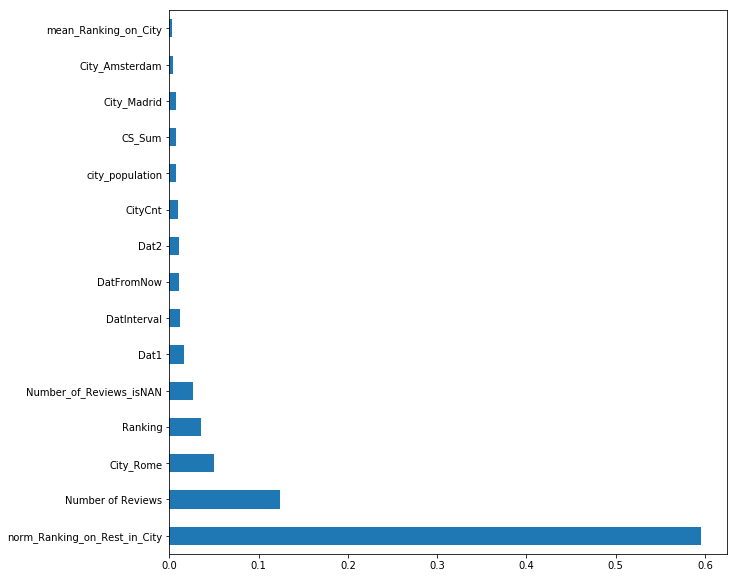

In [66]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [67]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,Number_of_Reviews_isNAN,Reviews_isNAN,Cuisine Style_isNAN,Price RangeisNAN,CS_Sum,city_population,CityCnt,...,Welsh,Wine Bar,Xinjiang,Yunnan,RevLen,DateLen,Dat1,Dat2,DatInterval,DatFromNow
3992,707.0,154.0,0.0,0,0,0,0,5.0,1300000,5,...,0,0,0,0,2,2,1515110400000000000,1502928000000000000,12182400000000000,111876497518742000
1537,11213.0,19.0,0.0,0,0,0,0,2.0,8787892,6,...,0,0,0,0,2,2,1468195200000000000,1443139200000000000,25056000000000000,171665297518742000
2989,784.0,39.0,0.0,0,0,0,0,2.0,1330993,9,...,0,0,0,0,2,2,1491868800000000000,1487808000000000000,4060800000000000,126996497518742000
5386,4643.0,20.0,0.0,0,0,0,0,5.0,1593075,5,...,0,0,0,0,2,2,1402790400000000000,1387497600000000000,15292800000000000,227306897518742000
7729,3359.0,24.0,0.0,0,0,1,1,0.0,1593075,4,...,0,0,0,0,2,2,1510185600000000000,1471910400000000000,38275200000000000,142894097518742000
2059,3611.0,154.0,0.0,0,0,0,0,6.0,8787892,3,...,0,0,0,0,2,2,1514419200000000000,1512604800000000000,1814400000000000,102199697518742000
5790,3778.0,15.0,0.0,0,0,0,0,2.0,8787892,4,...,0,0,0,0,2,2,1515196800000000000,1513468800000000000,1728000000000000,101335697518742000
7383,2071.0,65.0,0.0,0,0,0,0,2.0,1593075,1,...,0,0,0,0,2,2,1505779200000000000,1508371200000000000,-2592000000000000,106433297518742000
3496,7506.0,23.0,0.0,0,0,0,0,2.0,8787892,5,...,0,0,0,0,2,2,1498694400000000000,1507939200000000000,-9244800000000000,106865297518742000
794,4294.0,8.0,0.0,0,0,0,0,2.0,3726902,12,...,0,0,0,0,2,2,1504915200000000000,1441411200000000000,63504000000000000,173393297518742000


In [68]:
test_data = test_data.drop(['Rating'], axis=1)

In [69]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [70]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [71]:
predict_submission

array([3.09 , 4.175, 4.33 , ..., 3.045, 4.37 , 4.18 ])

In [72]:
# Округлим кратно .5
predict_submission = np.around(predict_submission*2)/2


In [73]:
predict_submission

array([3. , 4. , 4.5, ..., 3. , 4.5, 4. ])

In [74]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.5
7,id_7,3.0
8,id_8,4.0
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
